In [1]:
import pandas as pd
import numpy as np

heart = pd.read_csv('heart_disease.csv')
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


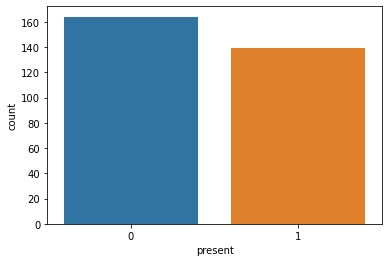

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(data = heart, x = 'present')
plt.show()

In [3]:
heart['ca'] = heart['ca'].replace("?", 0.0)
heart['ca'] = heart['ca'].astype('float')
heart['thal'] = heart['thal'].replace("?", 3.0)
heart['thal'] = heart['ca'].astype('float')

heart.groupby('present').agg({'age': 'mean',
                                'sex': 'mean',
                                'cp': 'mean',
                                'trestbps': 'mean',
                                 'chol': 'mean',
                                 'fbs': 'mean',
                                 'restecg': 'mean',
                                 'thalach': 'mean',
                                 'exang': 'mean',
                                'oldpeak': 'mean',
                                 'slope': 'mean',
                                  'ca': 'mean',
                                   'thal': 'mean'
                                 })


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
present,,,,,,,,,,,,,
0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.268293,0.268293
1,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338,1.129496,1.129496


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X = heart[['age', 'thalach', 'restecg', 'ca']]
y = heart['present']

model1 = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 727)

model1.fit(X_train, y_train)
predictions = model1.predict(X_train)
tp = sum((y_train == 1) & (predictions == 1))
tn = sum((y_train == 0) & (predictions == 0))
fp = sum((y_train == 0) & (predictions == 1))
fn = sum((y_train == 1) & (predictions == 0))

accuracy = (tp+tn)/len(y_train)
sens = tp / (tp + fn)
spec = tn / (tn + fp)
print(confusion_matrix(y_train, predictions))
print("The training accuracy of this model is {}%.".format(round(accuracy, 4)*100))
print("The training sensitivity of this model is {}%.".format(round(sens, 4)*100))
print("The training specificity of this model is {}%.".format(round(spec, 4)*100))

[[108  23]
 [ 36  75]]
The training accuracy of this model is 75.62%.
The training sensitivity of this model is 67.57%.
The training specificity of this model is 82.44%.


The model is good at correctly prediction negative cases, but could use some help correctly identifying positive cases. Overall, the model is semi-accurate but needs some work.

In [5]:
coefficients = model1.coef_
coefficients

array([[-0.03176416, -0.04446588,  0.18599619,  1.19083369]])

In [6]:
odds = np.exp(coefficients)
odds

array([[0.96873502, 0.95650824, 1.20441767, 3.28982274]])

Examining the odds we were able to gather from the coefficients, we see that holding other predictors constant it appears as though an increase in age and maximum heartrate lead to lower odds of heart disease. However, seeing as the odds are close to 1 this result isn't too inconcevible. 

Otherwise, we see that an increase in resting heart rate or in the number of vessels colored by the flourosopy with other predictors held constant increases the odds of heart disease by 20% and 229% respectively.

In [7]:
predictions = model1.predict(X_test)
tp = sum((y_test == 1) & (predictions == 1))
tn = sum((y_test == 0) & (predictions == 0))
fp = sum((y_test == 0) & (predictions == 1))
fn = sum((y_test == 1) & (predictions == 0))

accuracy = model1.score(X_test, y_test)
sens = tp / (tp + fn)
spec = tn / (tn + fp)
print(confusion_matrix(y_test, predictions))
print("The test accuracy of this model is {}%.".format(round(accuracy, 4)*100))
print("The test sensitivity of this model is {}%.".format(round(sens, 4)*100))
print("The test specificity of this model is {}%.".format(round(spec, 3)*100))

[[27  6]
 [ 9 19]]
The test accuracy of this model is 75.41%.
The test sensitivity of this model is 67.86%.
The test specificity of this model is 81.8%.


We see virtually no change in our test accuracy from our training accuracy, and we still see that we are far better at correctly identifying non-cases than cases. 

Now we'll see if our model's accuracy improves if we only consider patients with high cholesterol, a known predictor of heart disease.

109


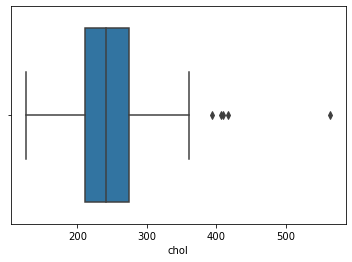

In [8]:
sns.boxplot(data = heart, x = "chol")
high_cholesterol = heart[heart["chol"] >= 260]
print(len(high_cholesterol))

We can see that a cholesterol level of 260 is roughly the third quartile marker of the overall distribution of cholesterol in the dataset, so we will call this "high cholesterol".

In [11]:
X_high = high_cholesterol[['age', 'thalach', 'restecg', 'ca']]
y_high = high_cholesterol["present"]

X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, test_size = .20, random_state = 100)
model2 = LogisticRegression()
model2.fit(X_train, y_train)
hc_train_predictions = model2.predict(X_train)

tp = sum((y_train == 1) & (hc_train_predictions == 1))
tn = sum((y_train == 0) & (hc_train_predictions == 0))
fp = sum((y_train == 0) & (hc_train_predictions == 1))
fn = sum((y_train == 1) & (hc_train_predictions == 0))

accuracy = model2.score(X_train, y_train)
sens = tp / (tp + fn)
spec = tn / (tn + fp)
print(confusion_matrix(y_train, hc_train_predictions))
print("The training accuracy of this model is {}%.".format(round(accuracy, 4)*100))
print("The training sensitivity of this model is {}%.".format(round(sens, 4)*100))
print("The training specificity of this model is {}%.".format(round(spec, 2)*100))

[[28 10]
 [12 37]]
The training accuracy of this model is 74.71%.
The training sensitivity of this model is 75.51%.
The training specificity of this model is 74.0%.


In [12]:
hc_test_predictions = model2.predict(X_test)
hc_test_accuracy = model2.score(X_test, y_test)

tp = sum((y_test == 1) & (hc_test_predictions == 1))
tn = sum((y_test == 0) & (hc_test_predictions == 0))
fp = sum((y_test == 0) & (hc_test_predictions == 1))
fn = sum((y_test == 1) & (hc_test_predictions == 0))

accuracy = model2.score(X_test, y_test)
sens = tp / (tp + fn)
spec = tn / (tn + fp)
print(confusion_matrix(y_test, hc_test_predictions))
print("The test accuracy of this model is {}%.".format(round(accuracy, 4)*100))
print("The test sensitivity of this model is {}%.".format(round(sens, 4)*100))
print("The test specificity of this model is {}%.".format(round(spec, 2)*100))

[[10  3]
 [ 3  6]]
The test accuracy of this model is 72.72999999999999%.
The test sensitivity of this model is 66.67%.
The test specificity of this model is 77.0%.


We can see that when only considering patients with high cholesterol and using our initial features in the model it performs far worse than our initial model wich predicted outcomes for patients regardless of their cholesterol levels.